<a href="https://colab.research.google.com/github/ZerXXX0/Twitter-s-Tweets-NLP/blob/main/Kopie_von_NLP_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas nltk textblob scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
column_names  = ['id', 'Konteks','Response','Komentar']
df = pd.read_csv('https://raw.githubusercontent.com/ZerXXX0/Twitter-s-Tweets-NLP/main/twitter_training.csv', header=None, names=column_names)
df

,id,Konteks,Response,Komentar
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


Data Exploration

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("First 5 Lines at the Dataset:")
print(df.head())
plt.show()

First 5 Lines at the Dataset:
     id      Konteks  Response  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            Komentar  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [6]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   Konteks   74682 non-null  object
 2   Response  74682 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [7]:
print("\nDescriptive Statistic")
print(df.describe())


Descriptive Statistic
                 id
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


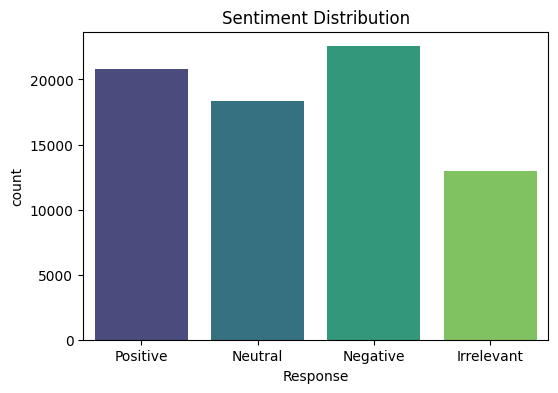

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [9]:
df = df.dropna(axis=0)

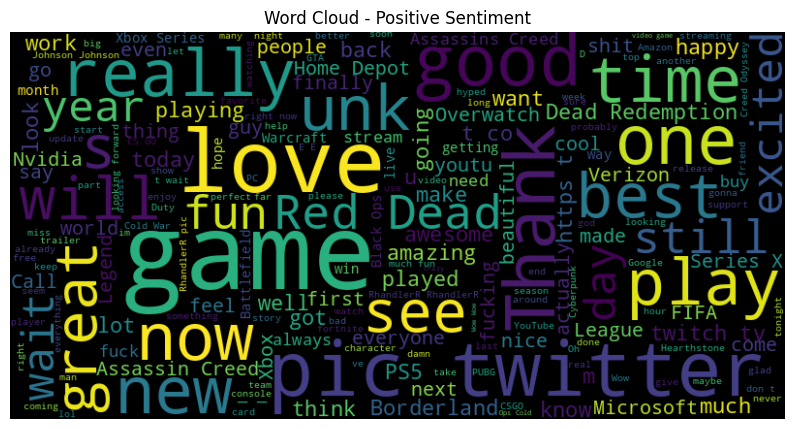

In [10]:
from wordcloud import WordCloud

positive_texts = ' '.join(df[df['Response'] == 'Positive']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

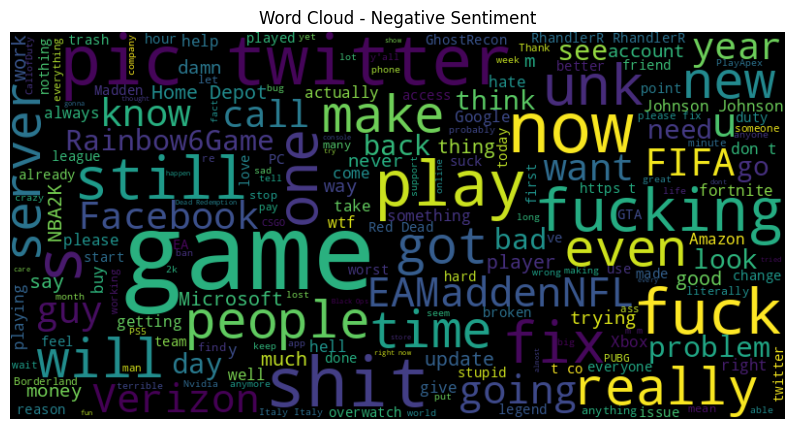

In [11]:
negative_texts = ' '.join(df[df['Response'] == 'Negative']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

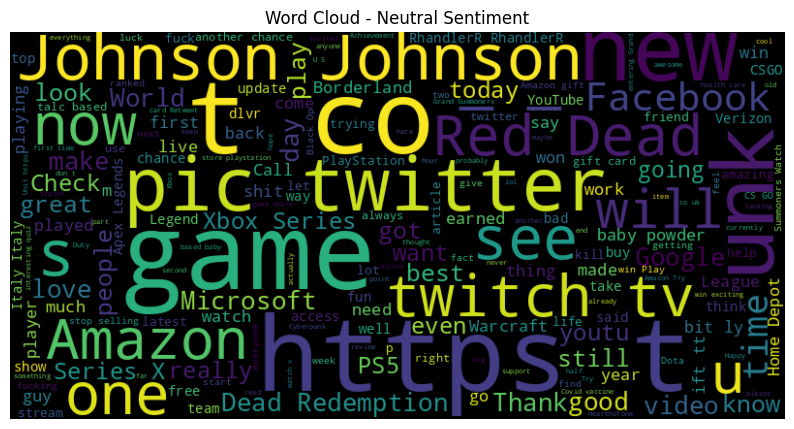

In [12]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Neutral']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Neutral Sentiment')
plt.show()

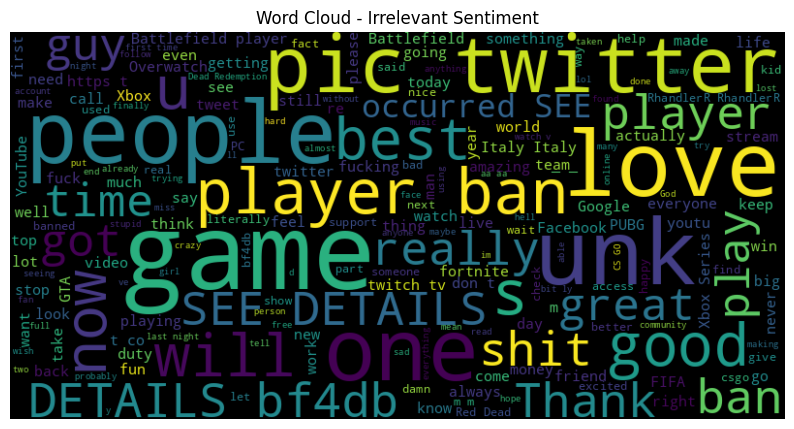

In [13]:
negative_texts = ' '.join(df[df['Response'] == 'Irrelevant']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Irrelevant Sentiment')
plt.show()

Data Processing

In [14]:
#Entering validation Data
column_names  = ['id', 'Konteks','Response','Komentar']
df_validation = pd.read_csv('https://raw.githubusercontent.com/ZerXXX0/Twitter-s-Tweets-NLP/main/twitter_validation.csv', header=None, names=column_names)

#Deleting null
df_validation = df_validation.dropna(axis=0)
df_validation

,id,Konteks,Response,Komentar
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)
df_validation['clean_Komentar'] = df_validation['Komentar'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-15-cae84bfb1f30>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)


In [16]:
# Pembagian dataset
#X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Komentar'], test_size=0.2, random_state=42)


In [17]:
#Using dataset that is already divided form validation file
X_train, y_train = df['clean_Komentar'], df['Response']
X_test, y_test = df_validation['clean_Komentar'], df_validation['Response']

In [18]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Model

In [20]:
# Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.723
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.54      0.64       172
    Negative       0.66      0.83      0.74       266
     Neutral       0.81      0.63      0.71       285
    Positive       0.71      0.83      0.76       277

    accuracy                           0.72      1000
   macro avg       0.74      0.71      0.71      1000
weighted avg       0.74      0.72      0.72      1000



In [21]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#Function for predicting sentiment with 4 classes
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = nb_model.predict(vectorized_text)[0]

    if prediction == 'Positive':
        return "Positive"
    elif prediction == 'Negative':
        return "Negative"
    elif prediction == 'Neutral':
        return "Neutral"
    elif prediction == 'Irrelevant':
        return "Irrelevant"
    else:
        return "Uncertain"  # If class is unknown

#Example
text_to_predict = "I love Nasi Goreng"
result = predict_sentiment(text_to_predict)
print(result)

Positive


In [ ]:
#Model testing with user input
user_input = input("Enter text to test: ")
prediction_output = predict_sentiment(user_input)
print(f'Sentiment Prediction: {prediction_output}')